In [252]:
import os
import wget
import time
import cv2
import uuid
import random
import math
import re
import shutil

# Setup

In [253]:
zoo_url = 'https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md'
pretrained_model_name = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
model_name = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned'
model_url='http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

In [254]:
workspace_paths = {
    'workspace_path':os.path.join('Tensorflow','workspace'),
    'Annotations':os.path.join('Tensorflow','workspace','annotations'),
    'Exported-models':os.path.join('Tensorflow','workspace','exported-models'),
    'images':os.path.join('Tensorflow','workspace','images'),
    'models':os.path.join('Tensorflow','workspace','models'),
    'pre-trained-models':os.path.join('Tensorflow','workspace','pre-trained-models'),
    'train':os.path.join('Tensorflow','workspace','images','train'),
    'test':os.path.join('Tensorflow','workspace','images','test'),
    'preprocessing':os.path.join('Tensorflow','scripts','preprocessing'),
    'api_model':os.path.join('Tensorflow','models'),
    'checkpoint_path':os.path.join('Tensorflow','workspace','models',model_name)
}

In [255]:
files = {
    'pipeline_config':os.path.join('Tensorflow','workspace','models',model_name,'pipeline.config'),
    'label_map':os.path.join('Tensorflow','workspace','annotations','label_map.pbtxt')
}

In [99]:
#Tensorflow model garden github clone
if not os.path.exists(os.path.join(workspace_paths['api_model'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {workspace_paths['api_model']}

In [100]:
#Protoc download and add to path
protoc_url = 'https://github.com/protocolbuffers/protobuf/releases/download/v3.17.3/protoc-3.17.3-win64.zip'
protoc_path=os.path.join('Tensorflow','models','research')
wget.download(protoc_url)
!move protoc-3.17.3-win64.zip {protoc_path}
!cd Tensorflow/models/research && tar -xf protoc-3.17.3-win64.zip 
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(protoc_path,'bin'))
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=.

100% [..........................................................................] 1504404 / 1504404        1 file(s) moved.


In [9]:
#Pycocotools install
!pip install cython
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

You should consider upgrading via the 'c:\objdet\venvobj\scripts\python.exe -m pip install --upgrade pip' command.


  Cloning https://github.com/philferriere/cocoapi.git to c:\users\user\appdata\local\temp\pip-req-build-wj2r7g5b
  Resolved https://github.com/philferriere/cocoapi.git to commit 2929bd2ef6b451054755dfd7ceb09278f935f7ad


  Running command git clone -q https://github.com/philferriere/cocoapi.git 'C:\Users\user\AppData\Local\Temp\pip-req-build-wj2r7g5b'
You should consider upgrading via the 'c:\objdet\venvobj\scripts\python.exe -m pip install --upgrade pip' command.


In [101]:
!cd Tensorflow/models/research && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install

        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_a

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
cl: Komut sat�r� warning D9025: '/MD', '/MT' ile ge‡ersiz k�l�n�yor
error: Setup script exited with error: command 'C:\\Program Files (x86)\\Microsoft Visual Studio\\2019\\BuildTools\\VC\\Tools\\MSVC\\14.29.30133\\bin\\HostX86\\x64\\cl.exe' failed with exit status 2


creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\build_imagenet_data.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\cifar10.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\dataset_factory.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\dataset_utils.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\download_and_convert_cifar10.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\download_and_convert_flowers.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\download_and_convert_mnist.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\download_and_convert_visualwakewords.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\download_and_convert_visualwakewords_lib.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\flowers.py -> build\bdist.win-amd64\egg\datasets
copying buil

byte-compiling build\bdist.win-amd64\egg\object_detection\meta_architectures\center_net_meta_arch_tf2_test.py to center_net_meta_arch_tf2_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\meta_architectures\context_rcnn_lib.py to context_rcnn_lib.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\meta_architectures\context_rcnn_lib_tf1_test.py to context_rcnn_lib_tf1_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\meta_architectures\context_rcnn_lib_tf2.py to context_rcnn_lib_tf2.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\meta_architectures\context_rcnn_lib_tf2_test.py to context_rcnn_lib_tf2_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\meta_architectures\context_rcnn_meta_arch.py to context_rcnn_meta_arch.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\meta_architectures\context_rcnn_meta_arch_test.py to context_rcnn_me

In [102]:
verification_scr = os.path.join(protoc_path,'object_detection','builders','model_builder_tf2_test.py')
!python {verification_scr}

2022-07-23 17:56:59.758899: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
Running tests under Python 3.8.3: C:\objdet\venvobj\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-07-23 17:57:02.552152: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2022-07-23 17:57:02.581910: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.755GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2022-07-23 17:57:02.581937: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2022-07-23 17:57:02.587229: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas64_11.dll
202

In [257]:
for path in workspace_paths.values():
    !mkdir {path}

A subdirectory or file Tensorflow\workspace already exists.
A subdirectory or file Tensorflow\workspace\annotations already exists.
A subdirectory or file Tensorflow\workspace\exported-models already exists.
A subdirectory or file Tensorflow\workspace\images already exists.
A subdirectory or file Tensorflow\workspace\models already exists.
A subdirectory or file Tensorflow\workspace\pre-trained-models already exists.
A subdirectory or file Tensorflow\workspace\images\train already exists.
A subdirectory or file Tensorflow\workspace\images\test already exists.
A subdirectory or file Tensorflow\scripts\preprocessing already exists.
A subdirectory or file Tensorflow\models already exists.
A subdirectory or file Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned already exists.


### Image Collection From Webcam

In [258]:
labels = ['car']

In [259]:
#cv2 image collection
# num_image = 15
# num_labels = 3
# cap = cv2.VideoCapture(0)
# for label in labels:
#     print(f"Collecting image for {label}")
#     time.sleep(5)
#     for image in range(num_image):
#         lbl,frame = cap.read()
#         print(f"Collecting image {image}")
#         imgname = os.path.join(workspace_paths['images'],label,label+f"{str(uuid.uuid1())}.jpg")
#         cv2.imwrite(imgname,frame)
#         cv2.imshow('frame',frame)
#         time.sleep(2)
#     if cv2.waitKey(1) == ord('q'):
#         break
            
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# Label Collected Images
!pip install labelImg

In [232]:
!labelImg

Image:C:\Users\user\Desktop\objdet\car\carsgraz_039.bmp -> Annotation:C:/Users/user/Desktop/objdet/car/carsgraz_039.xml
Image:C:\Users\user\Desktop\objdet\car\carsgraz_051.bmp -> Annotation:C:/Users/user/Desktop/objdet/car/carsgraz_051.xml
Image:C:\Users\user\Desktop\objdet\car\carsgraz_060.bmp -> Annotation:C:/Users/user/Desktop/objdet/car/carsgraz_060.xml
Image:C:\Users\user\Desktop\objdet\car\SSDB00001.JPG -> Annotation:C:/Users/user/Desktop/objdet/car/SSDB00001.xml
Image:C:\Users\user\Desktop\objdet\car\SSDB00002.JPG -> Annotation:C:/Users/user/Desktop/objdet/car/SSDB00002.xml
Image:C:\Users\user\Desktop\objdet\car\SSDB00003.JPG -> Annotation:C:/Users/user/Desktop/objdet/car/SSDB00003.xml
Image:C:\Users\user\Desktop\objdet\car\SSDB00004.JPG -> Annotation:C:/Users/user/Desktop/objdet/car/SSDB00004.xml
Image:C:\Users\user\Desktop\objdet\car\SSDB00005.JPG -> Annotation:C:/Users/user/Desktop/objdet/car/SSDB00005.xml
Image:C:\Users\user\Desktop\objdet\car\SSDB00006.JPG -> Annotation:C:/

### Split image from label folders to train and test folders.

In [262]:
image_path = workspace_paths['images']
train_path = workspace_paths['train']
test_path = workspace_paths['test']
def train_test_split(image_path,train_path,test_path,ratio,num_labels,copy_xml=False):
    label_folders = os.listdir(image_path)[:num_labels]
    for label in label_folders:
        img_list = [f for f in os.listdir(os.path.join(image_path,label)) if re.findall('[A-Za-z0-9\W_.\-:]+.(jpg|jpeg|png|bmp|JPG)',f)]
        split_val = math.ceil(len(img_list) * ratio)
        for i in range(split_val):
            idx = random.randint(0,len(img_list)-1)
            filename = img_list[idx]
            shutil.move(os.path.join(image_path,label,filename),train_path)
            if copy_xml:
                filename_xml = os.path.splitext(filename)[0]+'.xml'
                shutil.move(os.path.join(image_path,label,filename_xml),train_path)
            
            img_list.remove(img_list[idx])
        for filename in img_list:
            shutil.move(os.path.join(image_path,label,filename),test_path)
            if copy_xml:
                xml_filename = os.path.splitext(filename)[0]+'.xml'
                shutil.move(os.path.join(image_path,label,xml_filename),test_path)
                
                

In [263]:
train_test_split(image_path,train_path,test_path,ratio=0.8,copy_xml=True,num_labels=1)

In [264]:
#create label map folder
with open('Tensorflow/workspace/annotations/label_map.pbtxt','w') as f:
    for label in labels:
        f.write('item {\n\t')
        f.write(f'name:\'{label}\'\n\t')
        f.write(f'id:{labels.index(label)+1}\n')
        f.write('}\n')

In [106]:
#Download generatetfrecord.py code
wget.download('https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py',
             workspace_paths['preprocessing'])

100% [................................................................................] 6410 / 6410

'Tensorflow\\scripts\\preprocessing/generate_tfrecord.py'

In [265]:
#Generating tf.record files from .xml and .pbtxt
!python {os.path.join(workspace_paths['preprocessing'],'generate_tfrecord.py')} -x {workspace_paths['train']} -l {files['label_map']} -o {os.path.join(workspace_paths['Annotations'],'train.record')}

!python {os.path.join(workspace_paths['preprocessing'],'generate_tfrecord.py')} -x {workspace_paths['test']} -l {files['label_map']} -o {os.path.join(workspace_paths['Annotations'],'test.record')}

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [213]:
#Download pretrained model from 
#https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
wget.download(model_url,workspace_paths['pre-trained-models'])
!cd {workspace_paths['pre-trained-models']} && tar -xf {pretrained_model_name+'.tar.gz'}
os.remove(os.path.join(workspace_paths['pre-trained-models'],pretrained_model_name+'.tar.gz'))


100% [........................................................................] 20515344 / 20515344

In [214]:
copy {os.path.join(workspace_paths['pre-trained-models'],pretrained_model_name,'pipeline.config')} {workspace_paths['checkpoint_path']}

        1 file(s) copied.


In [266]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

### Update pipeline_config for transfer learning 

In [267]:
#Update pipeline_config for transfer learning 
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['pipeline_config'],'r') as f:
    proto_str = f.read()
    text_format.Merge(proto_str,pipeline_config)

In [268]:
#Make changes to pipeline
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(workspace_paths['pre-trained-models'],
pretrained_model_name, 'checkpoint','ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = 'detection'
pipeline_config.train_input_reader.label_map_path = files['label_map']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(workspace_paths['Annotations'],
'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['label_map']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(workspace_paths['Annotations'],'test.record')]

In [269]:
#Write and save changes to pipeline.config file
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(os.path.join(files['pipeline_config']), "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

In [270]:
#Training the model
training_script = os.path.join(workspace_paths['api_model'],'research','object_detection','model_main_tf2.py')
command = f"python {training_script} --model_dir={workspace_paths['checkpoint_path']} --pipeline_config_path={files['pipeline_config']} --num_train_steps=3000"

In [271]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned --pipeline_config_path=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned\pipeline.config --num_train_steps=3000


In [ ]:
!{command}

In [67]:
#tensorboard --logdir=. (train dir)

In [272]:
#Evaluation
command = f"python {training_script} --model_dir={workspace_paths['checkpoint_path']} --pipeline_config_path={files['pipeline_config']} --checkpoint_dir={workspace_paths['checkpoint_path']}"
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned --pipeline_config_path=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned


In [ ]:
!{command}

In [273]:
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

# Load Train Model From Checkpoint

In [241]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['pipeline_config'])
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config,is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(workspace_paths['checkpoint_path'],'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image,shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image,shapes)
    detections = detection_model.postprocess(prediction_dict,shapes)
    return detections

# Detect from an Image

In [274]:
import cv2 
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [275]:
category_index = label_map_util.create_category_index_from_labelmap(files['label_map'])

In [278]:
image_instance_path = os.path.join(workspace_paths['test'],'carsgraz_043.bmp')

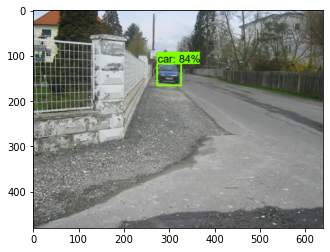

In [279]:
img = Image.open(image_instance_path)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np,0),dtype=tf.float32)
detections = detect_fn(input_tensor)
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0,:num_detections].numpy()
             for key,value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)


label_id_offset = 1
img_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(img_with_detections,
                                                   detections['detection_boxes'],
                                                    detections['detection_classes']+label_id_offset,
                                                    detections['detection_scores'],
                                                    category_index,
                                                    use_normalized_coordinates=True,
                                                    max_boxes_to_draw=5,
                                                    min_score_thresh=.8,
                                                    agnostic_mode=False)      

plt.imshow(img_with_detections)
plt.show()

# Real Time Detections From Video

In [288]:
cap = cv2.VideoCapture("road-view.mp4")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
m,s = 18,40
fps = cap.get(cv2.CAP_PROP_FPS)
cap.set(1,fps*(m*60+s))
while True:
    ret,frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np,0),dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key:value[0,:num_detections].numpy()
                 for key,value in detections.items()}
    
    detections['num_detections'] = num_detections
    
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(image_np_with_detections,
                                                       detections['detection_boxes'],
                                                       detections['detection_classes']+label_id_offset,
                                                       detections['detection_scores'],
                                                       category_index,
                                                       use_normalized_coordinates=True,
                                                       max_boxes_to_draw=5,
                                                       min_score_thresh=.7,
                                                       agnostic_mode=False)
    
    cv2.imshow('object detection',cv2.resize(image_np_with_detections,(800,600)))
    
    if cv2.waitKey(1) == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# Export Model

In [289]:
freeze_script = os.path.join(workspace_paths['api_model'],'research','object_detection','exporter_main_v2.py')

command = f"python {freeze_script} --input_type=image_tensor --pipeline_config_path={files['pipeline_config']} --trained_checkpoint_dir={workspace_paths['checkpoint_path']} --output_directory={workspace_paths['Exported-models']}"
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned --output_directory=Tensorflow\workspace\exported-models


In [290]:
!{command}

2022-07-23 21:34:51.043124: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2022-07-23 21:34:53.854915: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2022-07-23 21:34:53.883716: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.755GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2022-07-23 21:34:53.883743: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2022-07-23 21:34:53.889118: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas64_11.dll
2022-07-23 21:34:53.889140: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublasLt64

# Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [291]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(workspace_paths['Exported-models'], 'saved_model'), os.path.join(workspace_paths['Exported-models'],'tfjs_export'))

In [292]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\exported-models\saved_model Tensorflow\workspace\exported-models\tfjs_export


# Conversion to TFLite

In [293]:
Tflite_script = os.path.join(workspace_paths['api_model'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [294]:
command = f"python {Tflite_script} --pipeline_config_path={files['pipeline_config']} --trained_checkpoint_dir={workspace_paths['checkpoint_path']} --output_directory={os.path.join(workspace_paths['Exported-models'],'Tflite_saved')}"

In [295]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8_tuned --output_directory=Tensorflow\workspace\exported-models\Tflite_saved


In [296]:
FROZEN_TFLITE_PATH = os.path.join(workspace_paths['Exported-models'],'Tflite_saved','saved_model')
TFLITE_MODEL = os.path.join(workspace_paths['Exported-models'],'Tflite_saved','saved_model', 'detect.tflite')



In [297]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [298]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\exported-models\Tflite_saved\saved_model --output_file=Tensorflow\workspace\exported-models\Tflite_saved\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


# Zip and Export Models

In [42]:
!tar -czf models.tar.gz {workspace_paths['checkpoint_path']}